# ML-2 Regresi Lanjutan

Sebelum mulai:
*   Student yang pakai Colab, silahkan "Save a Copy in Drive" dahulu
*   Student yang pakai Jupyter Notebook, silahkan download code ini dahulu



# Import Library

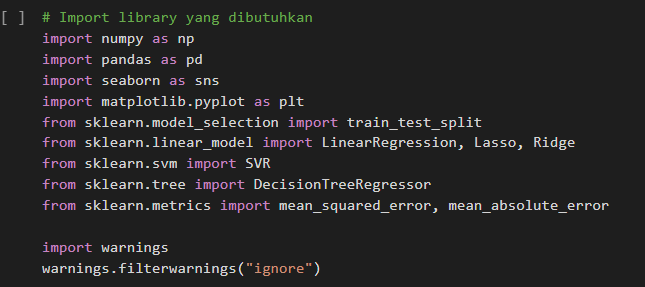

In [2]:
# Tulis di sini
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

# Load Dataset
https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/kc_house_3_features.csv

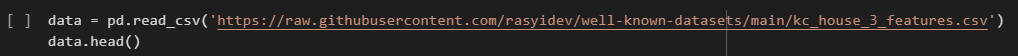

In [ ]:
# Tulis di sini
data = pd.read_csv('https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/kc_house_3_features.csv')
data.head()

,sqft_living,sqft_living15,sqft_above,price
0,1180,1340,1180,221900.0
1,2570,1690,2170,538000.0
2,770,2720,770,180000.0
3,1960,1360,1050,604000.0
4,1680,1800,1680,510000.0


Dataset memiliki 3 feature:
- sqft_living
- sqft_living15
- sqft_above

dan sebuah label, yakni price.

# 1. Analisis Korelasi

Lakukan analisis korelasi terhadap dataset.

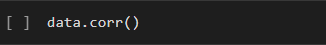

In [ ]:
# Tulis di sini
data.corr()

,sqft_living,sqft_living15,sqft_above,price
sqft_living,1.000000,0.774798,0.837615,0.650602
sqft_living15,0.774798,1.000000,0.755848,0.648145
sqft_above,0.837615,0.755848,1.000000,0.515989
price,0.650602,0.648145,0.515989,1.000000


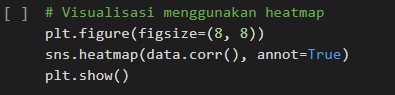

<function matplotlib.pyplot.show(close=None, block=None)>

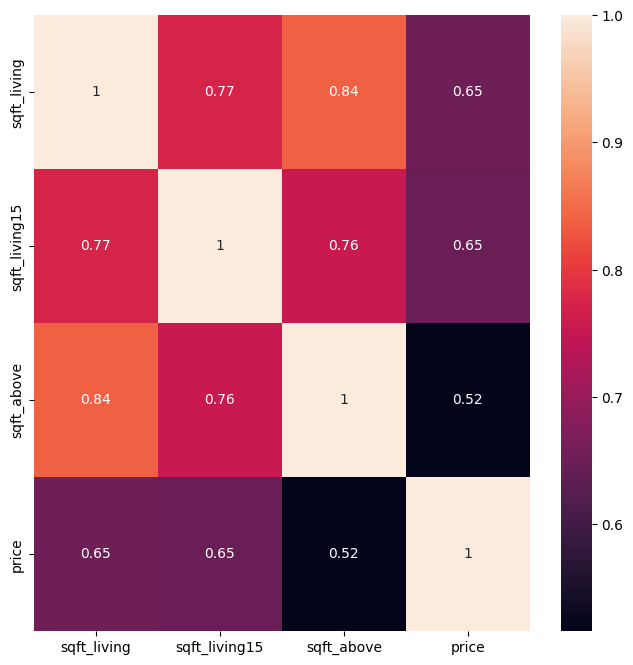

In [ ]:
# Tulis di sini
plt.figure(figsize=(8,8 ))
sns.heatmap(data.corr(), annot=True)
plt.show

Hasil analisis korelasi menunjukkan bahwa:
- semua feature berkorelasi positif terhadap price
- feature sqft_living dan sqft_living15 memiliki koefisien korelasi tertinggi

# Split Dataset

Split dataset menjadi:
- training data (X_train dan y_train) 80%
- testing data (X_test dan y_test) 20%

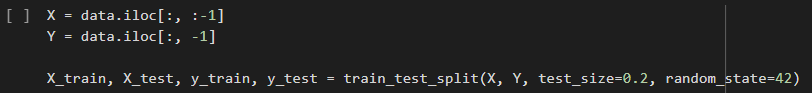

In [ ]:
# Tulis di sini
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size = 0.2, random_state=42)

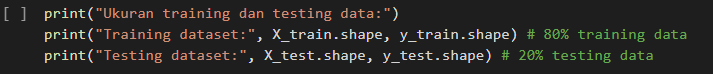

In [ ]:
# Tulis di sini
print("Ukuran training dan testing data")
print("Training Datasest: ", X_train.shape, y_train.shape) #80% dari training data
print("testing dataset: ", X_test.shape, y_test.shape) #20% testing datanya

Ukuran training dan testing data
Training Datasest:  (80, 3) (80,)
testing dataset:  (20, 3) (20,)


# 2. Modeling

Pada program ini, kita akan melatih lebih dari satu model regresi, antara lain:
- Regresi Linier
- Regresi Lasso
- Regresi Ridge
- Support Vector Regressor (SVR)
- Decision Tree Regressor (DTR)

Latih semua model menggunakan training data (X_train dan y_train)


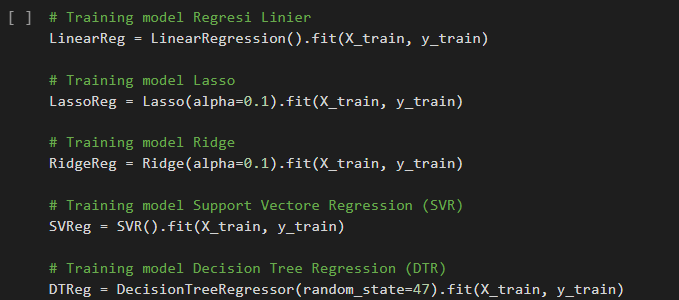

In [ ]:
# Tulis di sini
LinearReg = LinearRegression().fit(X_train, y_train) #Training model regresi Linier

LassoReg = Lasso(alpha=0.1).fit(X_train, y_train) #training model Lasso

RidgeReg= Ridge(alpha=0.1).fit(X_train, y_train) #Training model Ridge

SVReg = SVR().fit(X_train, y_train) #Training model support vectore Regression (SVR)

DTReg = DecisionTreeRegressor(random_state=47).fit(X_train, y_train) #training model decision tree regression




**alpha=0.1** dan **random_state=47** disebut sebagai hyperparameter.

Umumnya, setiap algoritma AI memiliki hyperparameter yang bisa kita setel (tuning) sesuai keinginan.

Setelan hyperparameter yang tepat mampu meningkatkan performa model.

Kunjungi dokumentasi library untuk mempelajari tentang hyperparameter:
- [Regresi Linier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Regresi Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
- [Regresi Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
- [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
- [DTR](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

# 3. Evaluasi Model Menggunakan Metric MSE dan R2

Lakukan evaluasi pada semua model yang telah dilatih. Sebelum itu, kita perlu men-generate hasil prediksi tiap model.

Generate:
- hasil prediksi training data (y pred train)
- hasil prediksi testing data (y pred test)

menggunakan model.

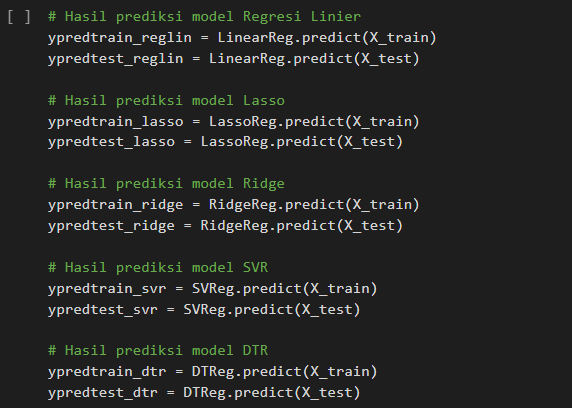

In [ ]:
# Tulis di sini
ypredtrain_reglin = LinearReg.predict(X_train)
ypredtest_reglin = LinearReg.predict(X_test)

ypredtrain_lasso = LassoReg.predict(X_train)
ypredtest_lasso = LassoReg.predict(X_test)

ypredtrain_ridge = RidgeReg.predict(X_train)
ypredtest_ridge = RidgeReg.predict(X_test)

ypredtrain_svr = SVReg.predict(X_train)
ypredtest_svr = SVReg.predict(X_test)

ypredtrain_dtr = DTReg.predict(X_train)
ypredtest_dtr = DTReg.predict(X_test)

Evaluasi pertama dilakukan menggunakan metric MSE.

Bandingkan:
- label training data (y_train) dengan hasil prediksi training data (y pred train)
- label testing data (y_test) dengan hasil prediksi testing data (y pred test)

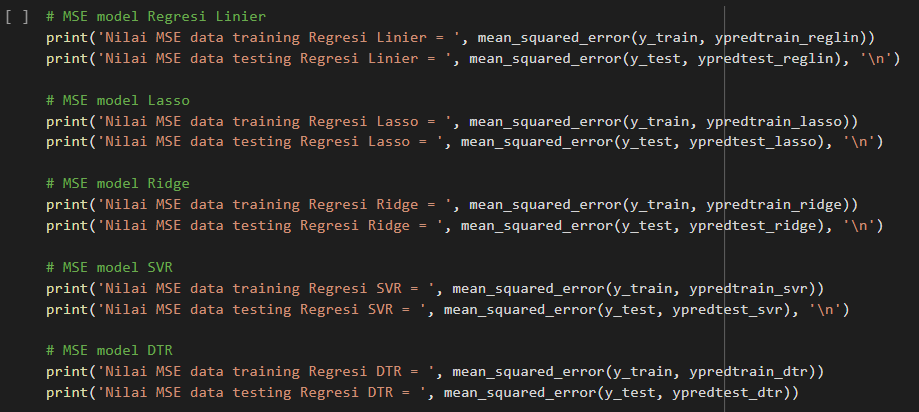

In [ ]:
# Tulis di sini
print('Nilai MSE data training Regresi Linier = ', mean_squared_error(y_train, ypredtrain_reglin))
print('Nilai MSE data training Regresi Linier = ', mean_squared_error(y_test, ypredtest_reglin), '\n')

print('Nilai MSE data training Regresi Lasso = ', mean_squared_error(y_train, ypredtrain_lasso))
print('Nilai MSE data training Regresi Lasso = ', mean_squared_error(y_test, ypredtest_lasso), '\n')

print('Nilai MSE data training Regresi Ridge = ', mean_squared_error(y_train, ypredtrain_ridge))
print('Nilai MSE data training Regresi Ridge = ', mean_squared_error(y_test, ypredtest_ridge), '\n')

print('Nilai MSE data training Regresi SVR = ', mean_squared_error(y_train, ypredtrain_svr))
print('Nilai MSE data training Regresi SVR = ', mean_squared_error(y_test, ypredtest_svr), '\n')

print('Nilai MSE data training Regresi DTR = ', mean_squared_error(y_train, ypredtrain_dtr))
print('Nilai MSE data training Regresi DTR = ', mean_squared_error(y_test, ypredtest_dtr), '\n')

Nilai MSE data training Regresi Linier =  51040616225.03679
Nilai MSE data training Regresi Linier =  32881775262.15838 

Nilai MSE data training Regresi Lasso =  51040616225.03679
Nilai MSE data training Regresi Lasso =  32881775271.07427 

Nilai MSE data training Regresi Ridge =  51040616225.0368
Nilai MSE data training Regresi Ridge =  32881775254.902454 

Nilai MSE data training Regresi SVR =  113673471256.08711
Nilai MSE data training Regresi SVR =  37393496977.231895 

Nilai MSE data training Regresi DTR =  455625000.0
Nilai MSE data training Regresi DTR =  40958648000.0 



Hasil evaluasi MSE menunjukkan bahwa:


Model | MSE traing data | MSE testing data | Keputusan
---|---|---|---|
Regresi Linier | 51040616225.03679 | 32881775262.15838 | -
Regresi Lasso | 51040616225.0368 | 32881775271.07428 | -
Regresi Ridge | 32881775271.07428 | 32881775254.902466 | -
SVR | 113673471256.08711 | 37393496977.231895 | Overfit
DTR | 455625000.0 | 40958648000.0 | Goodfit

Model DTR merupakan model terbaik karena MSE training dan testing tidak jauh berbeda.

> **Note**: Regresi Linier, Lasso, dan Ridge memiliki MSE training yang lebih tinggi dibanding MSE testing. Hal ini bisa terjadi karena data kita berjumlah sedikit. Salah satu solusinya adalah dengan menambah jumlah data dalam dataset.

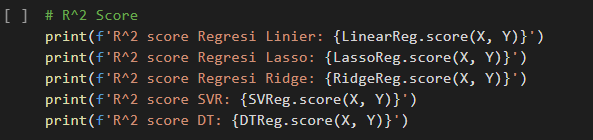

In [ ]:
# Tulis di sini
print(f'R^2 score Regresi Linier: {LinearReg.score(X, Y)}')
print(f'R^2 score Regresi Lasso: {LassoReg.score(X, Y)}')
print(f'R^2 score Regresi Ridge: {RidgeReg.score(X, Y)}')
print(f'R^2 score SVR: {SVReg.score(X, Y)}')
print(f'R^2 score DT: {DTReg.score(X, Y)}')

R^2 score Regresi Linier: 0.48353037146199596
R^2 score Regresi Lasso: 0.48353037144257016
R^2 score Regresi Ridge: 0.4835303714778053
R^2 score SVR: -0.07215508470730314
R^2 score DT: 0.906788861012355


Pilih model dengan R^2 score mendekati 1.

Hasil evaluasi R^2 score menunjukkan bahwa DTR merupakan model terbaik.

## Visualisasi Hasil Prediksi dengan Data Sebenarnya

Visualisasikan perbandingan antara label testing data (y_test) dengan hasil prediksi testing data (y pred test) pada setiap model.

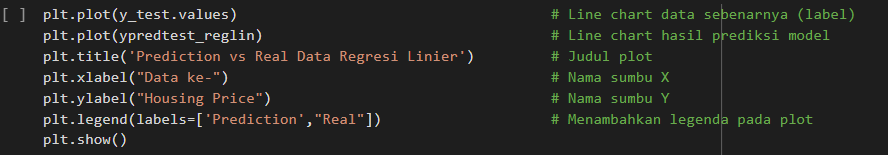

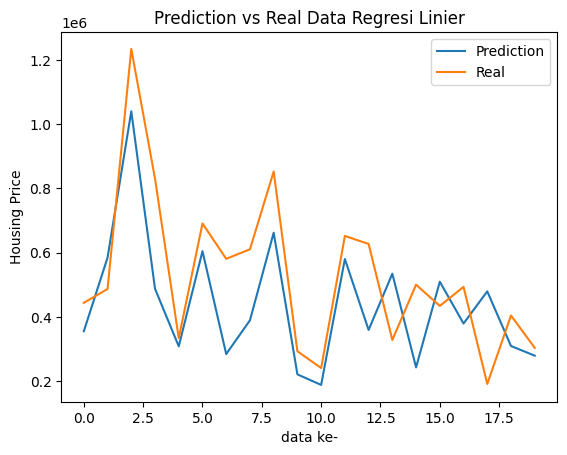

In [ ]:
# Tulis di sini
plt.plot(y_test.values)
plt.plot(ypredtest_reglin)
plt.title('Prediction vs Real Data Regresi Linier')
plt.xlabel("data ke-")
plt.ylabel("Housing Price")
plt.legend(labels=['Prediction', "Real"])
plt.show()

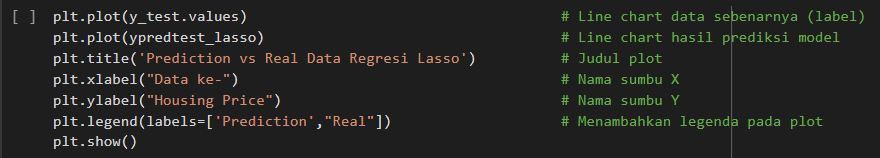

In [ ]:
# Tulis di sini
# Tulis di sini
plt.plot(y_test.values)
plt.plot(ypredtest_lasso)
plt.title('Prediction vs Real Data Regresi Lasso')
plt.xlabel("data ke-")
plt.ylabel("Housing Price")
plt.legend(labels=['Prediction', "Real"])
plt.show()

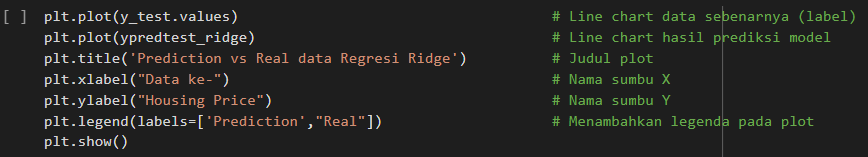

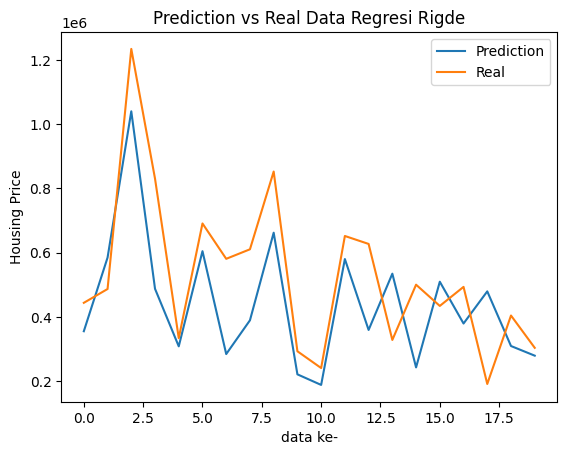

In [ ]:
# Tulis di sini
# Tulis di sini
plt.plot(y_test.values)
plt.plot(ypredtest_ridge)
plt.title('Prediction vs Real Data Regresi Rigde')
plt.xlabel("data ke-")
plt.ylabel("Housing Price")
plt.legend(labels=['Prediction', "Real"])
plt.show()

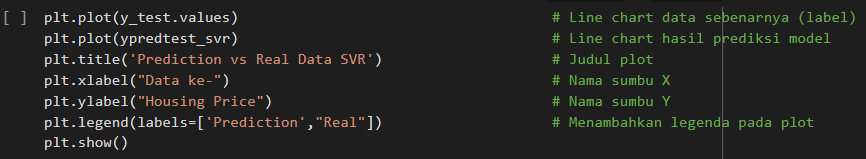

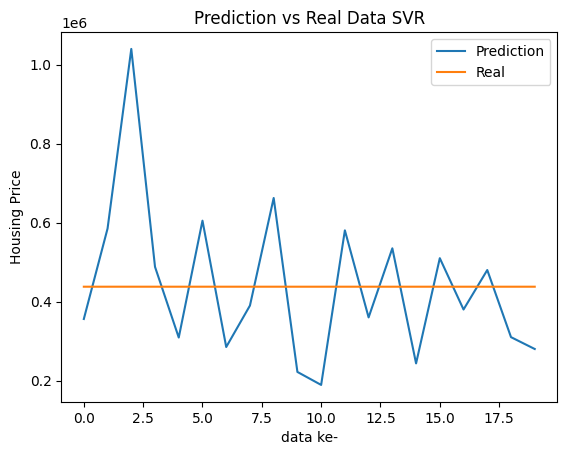

In [ ]:
# Tulis di sini
# Tulis di sini
plt.plot(y_test.values)
plt.plot(ypredtest_svr)
plt.title('Prediction vs Real Data SVR')
plt.xlabel("data ke-")
plt.ylabel("Housing Price")
plt.legend(labels=['Prediction', "Real"])
plt.show()

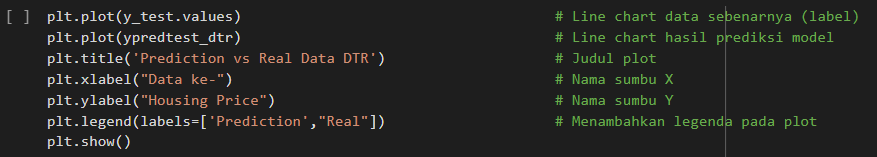

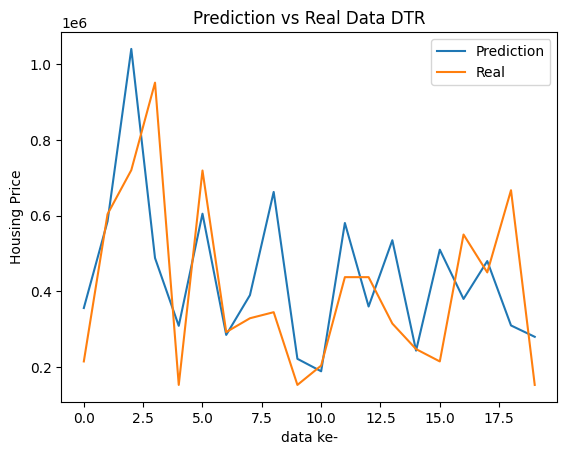

In [ ]:
# Tulis di sini
plt.plot(y_test.values)
plt.plot(ypredtest_dtr)
plt.title('Prediction vs Real Data DTR')
plt.xlabel("data ke-")
plt.ylabel("Housing Price")
plt.legend(labels=['Prediction', "Real"])
plt.show()

# Kesimpulan

Model DTR merupakan model terbaik berdasarkan hasil evaluasi menggunakan metrics MSE dan R^2.

Model DTR selanjutnya kita pilih untuk memprediksi data baru.

Model DTR juga sudah bisa kita deploy. Materi deployment akan disampaikan saat AI Domain.

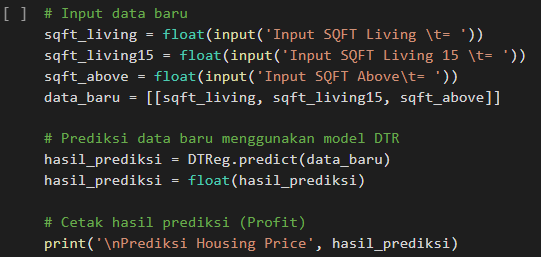

In [ ]:
# Tulis di sini
sqft_living = float(input('Input SQFT Living \t= '))
sqft_living15 = float(input('Input SQFT Living 15 \t= '))
sqft_above = float(input('Input SQFT Above\t= '))
data_baru = [[sqft_living, sqft_living15, sqft_above]]

hasil_prediksi = DTReg.predict(data_baru)
hasil_prediksi = float(hasil_prediksi)

print('\nPrediksi Houseing Price', hasil_prediksi)

Input SQFT Living 	= 1000
Input SQFT Living 15 	= 3500
Input SQFT Above	= 5000

Prediksi Houseing Price 291850.0


# Exercise (Latihan)

1. Download dataset [di sini](https://drive.google.com/file/d/1ir-ilrC_m4XAny9tklloJc52oLITjUGy/view?usp=sharing).

2. Buat model regresi linier dan model regresi lainnya menggunakan dataset tersebut!
3. Evaluasi setiap model!
4. Tentukan dan jelaskan model yang paling baik!

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Tulis di sini
data = pd.read_csv('/content/housing_price.csv')
data.head()

,total_rooms,housing_median_age,population,median_house_value
0,880.0,41.0,322.0,452600.0
1,7099.0,21.0,2401.0,358500.0
2,1467.0,52.0,496.0,352100.0
3,1274.0,52.0,558.0,341300.0
4,1627.0,52.0,565.0,342200.0


In [4]:
data.corr()

,total_rooms,housing_median_age,population,median_house_value
total_rooms,1.000000,-0.033254,0.920196,0.253887
housing_median_age,-0.033254,1.000000,-0.062477,0.018831
population,0.920196,-0.062477,1.000000,0.129279
median_house_value,0.253887,0.018831,0.129279,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

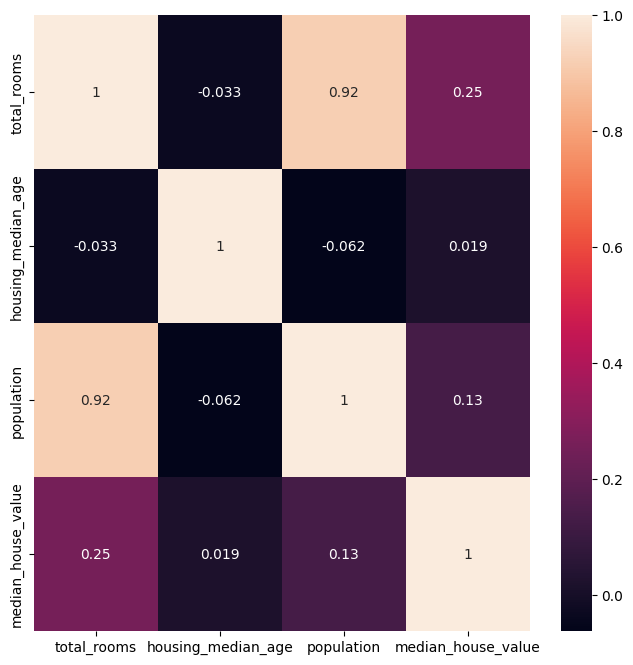

In [5]:
# Tulis di sini
plt.figure(figsize=(8,8 ))
sns.heatmap(data.corr(), annot=True)
plt.show

In [6]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size = 0.20, random_state=45)

In [7]:
print("Ukuran training dan testing data")
print("Training Datasest: ", X_train.shape, y_train.shape)
print("testing dataset: ", X_test.shape, y_test.shape)

Ukuran training dan testing data
Training Datasest:  (80, 3) (80,)
testing dataset:  (20, 3) (20,)


In [8]:
# Tulis di sini
LinearReg = LinearRegression().fit(X_train, y_train) #Training model regresi Linier

LassoReg = Lasso(alpha=0.1).fit(X_train, y_train) #training model Lasso

RidgeReg= Ridge(alpha=0.1).fit(X_train, y_train) #Training model Ridge

SVReg = SVR().fit(X_train, y_train) #Training model support vectore Regression (SVR)

DTReg = DecisionTreeRegressor(random_state=20).fit(X_train, y_train) #training model decision tree regression

In [9]:
# Tulis di sini
ypredtrain_reglin = LinearReg.predict(X_train)
ypredtest_reglin = LinearReg.predict(X_test)

ypredtrain_lasso = LassoReg.predict(X_train)
ypredtest_lasso = LassoReg.predict(X_test)

ypredtrain_ridge = RidgeReg.predict(X_train)
ypredtest_ridge = RidgeReg.predict(X_test)

ypredtrain_svr = SVReg.predict(X_train)
ypredtest_svr = SVReg.predict(X_test)

ypredtrain_dtr = DTReg.predict(X_train)
ypredtest_dtr = DTReg.predict(X_test)

In [10]:
# Tulis di sini
print('Nilai MSE data training Regresi Linier = ', mean_squared_error(y_train, ypredtrain_reglin))
print('Nilai MSE data training Regresi Linier = ', mean_squared_error(y_test, ypredtest_reglin), '\n')

print('Nilai MSE data training Regresi Lasso = ', mean_squared_error(y_train, ypredtrain_lasso))
print('Nilai MSE data training Regresi Lasso = ', mean_squared_error(y_test, ypredtest_lasso), '\n')

print('Nilai MSE data training Regresi Ridge = ', mean_squared_error(y_train, ypredtrain_ridge))
print('Nilai MSE data training Regresi Ridge = ', mean_squared_error(y_test, ypredtest_ridge), '\n')

print('Nilai MSE data training Regresi SVR = ', mean_squared_error(y_train, ypredtrain_svr))
print('Nilai MSE data training Regresi SVR = ', mean_squared_error(y_test, ypredtest_svr), '\n')

print('Nilai MSE data training Regresi DTR = ', mean_squared_error(y_train, ypredtrain_dtr))
print('Nilai MSE data training Regresi DTR = ', mean_squared_error(y_test, ypredtest_dtr), '\n')

Nilai MSE data training Regresi Linier =  4304976063.139377
Nilai MSE data training Regresi Linier =  11348923396.55395 

Nilai MSE data training Regresi Lasso =  4304976063.139444
Nilai MSE data training Regresi Lasso =  11348923251.555513 

Nilai MSE data training Regresi Ridge =  4304976063.139382
Nilai MSE data training Regresi Ridge =  11348923367.740057 

Nilai MSE data training Regresi SVR =  4607816167.111286
Nilai MSE data training Regresi SVR =  15059629089.196484 

Nilai MSE data training Regresi DTR =  0.0
Nilai MSE data training Regresi DTR =  10393761000.0 



In [12]:
# Tulis di sini
print(f'R^2 score Regresi Linier: {LinearReg.score(X, Y)}')
print(f'R^2 score Regresi Lasso: {LassoReg.score(X, Y)}')
print(f'R^2 score Regresi Ridge: {RidgeReg.score(X, Y)}')
print(f'R^2 score SVR: {SVReg.score(X, Y)}')
print(f'R^2 score DT: {DTReg.score(X, Y)}')

R^2 score Regresi Linier: 0.0922222953707098
R^2 score Regresi Lasso: 0.09222229997804288
R^2 score Regresi Ridge: 0.09222229628627387
R^2 score SVR: -0.06417690759672823
R^2 score DT: 0.66973707780624


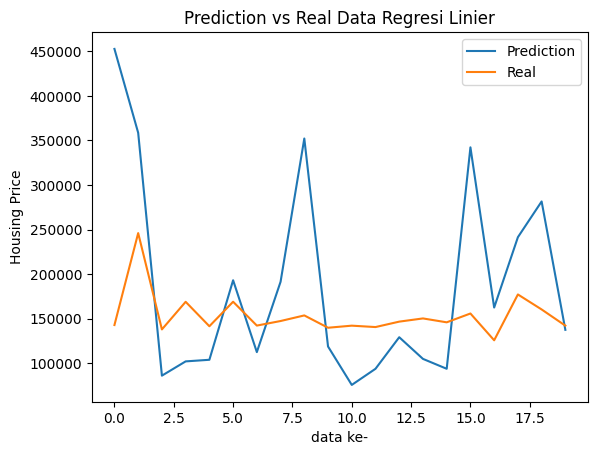

In [13]:
# Tulis di sini
plt.plot(y_test.values)
plt.plot(ypredtest_reglin)
plt.title('Prediction vs Real Data Regresi Linier')
plt.xlabel("data ke-")
plt.ylabel("Housing Price")
plt.legend(labels=['Prediction', "Real"])
plt.show()

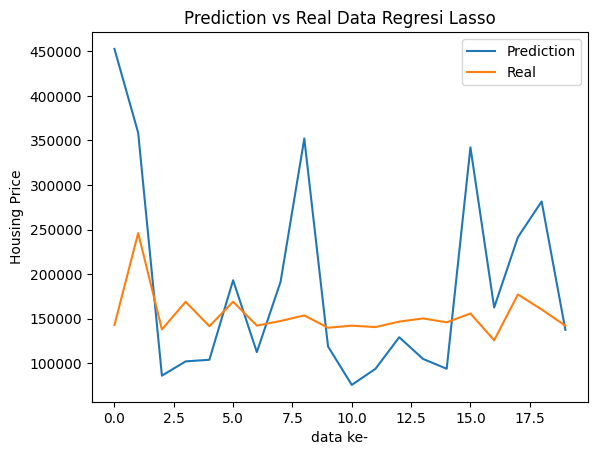

In [14]:
# Tulis di sini
# Tulis di sini
plt.plot(y_test.values)
plt.plot(ypredtest_lasso)
plt.title('Prediction vs Real Data Regresi Lasso')
plt.xlabel("data ke-")
plt.ylabel("Housing Price")
plt.legend(labels=['Prediction', "Real"])
plt.show()

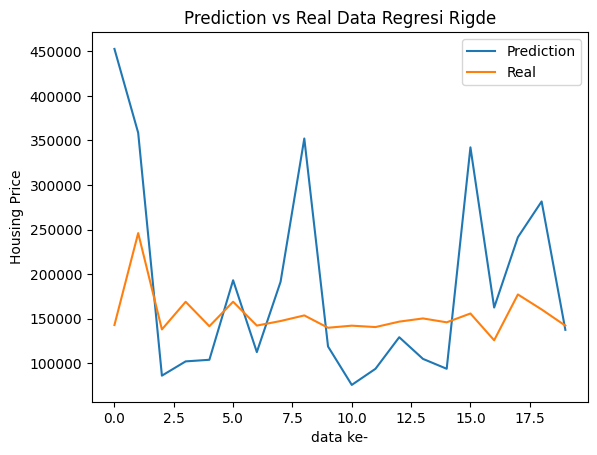

In [ ]:
plt.plot(y_test.values)
plt.plot(ypredtest_ridge)
plt.title('Prediction vs Real Data Regresi Rigde')
plt.xlabel("data ke-")
plt.ylabel("Housing Price")
plt.legend(labels=['Prediction', "Real"])
plt.show()

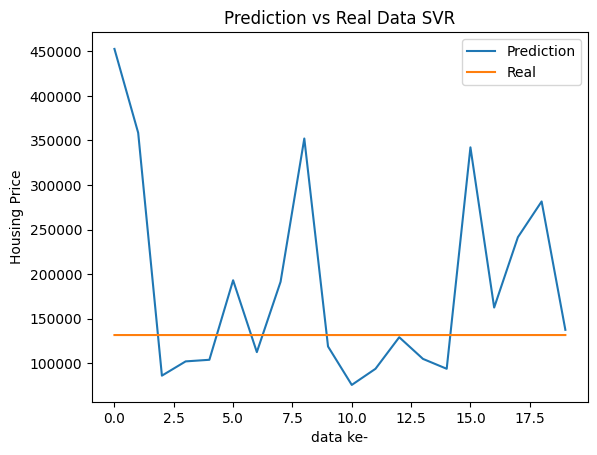

In [ ]:
plt.plot(y_test.values)
plt.plot(ypredtest_svr)
plt.title('Prediction vs Real Data SVR')
plt.xlabel("data ke-")
plt.ylabel("Housing Price")
plt.legend(labels=['Prediction', "Real"])
plt.show()

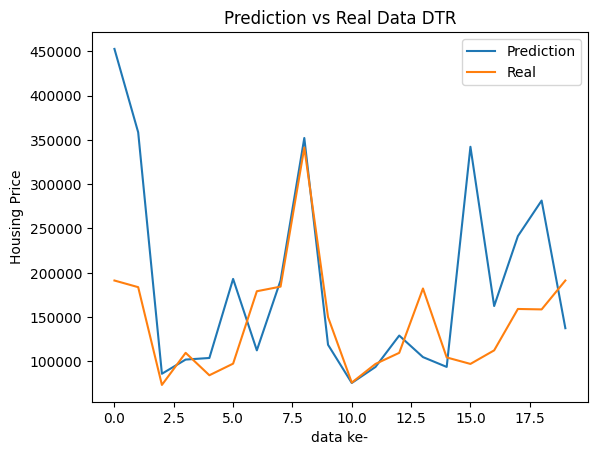

In [ ]:

plt.plot(y_test.values)
plt.plot(ypredtest_dtr)
plt.title('Prediction vs Real Data DTR')
plt.xlabel("data ke-")
plt.ylabel("Housing Price")
plt.legend(labels=['Prediction', "Real"])
plt.show()

Model paling baik pada data yang saya train merupakan DTR yang mendapatkan nilai 0.66973707780624, DTR dinyatakan menjadi nilai paling baik dari pada yang lain


In [ ]:
# Tulis di sini
sqft_living = float(input('Input SQFT Living \t= '))
sqft_living15 = float(input('Input SQFT Living 15 \t= '))
sqft_above = float(input('Input SQFT Above\t= '))
data_baru = [[sqft_living, sqft_living15, sqft_above]]

hasil_prediksi = DTReg.predict(data_baru)
hasil_prediksi = float(hasil_prediksi)

print('\nPrediksi Houseing Price', hasil_prediksi)

In [17]:
# Tulis di sini
total_rooms = float(input('Input SQFT Total Rooms \t= '))
housing_median_age = float(input('Input SQFT housing_median_age \t= '))
population = float(input('Input SQFT Population \t= '))
data_baru = [[total_rooms,housing_median_age, population]]

hasil_prediksi = DTReg.predict(data_baru)
hasil_prediksi = float(hasil_prediksi)

print('\nPrediksi House Value', hasil_prediksi)

Input SQFT Total Rooms 	= 880
Input SQFT housing_median_age 	= 41.0
Input SQFT Population 	= 322.0

Prediksi House Value 191300.0
